In [27]:
library(googlesheets4)
gs4_deauth()
sheet_data <- read_sheet("13CmIStaYtiQqR_dhBPrkHJINvVln9cepHypNinVQT3c")
x1 <- sheet_data[[1]]
x2 <- sheet_data[[2]]
y <- sheet_data[[3]]
x=cbind(x1,x2)

✔ Reading from synthetic data.

✔ Range problem-2.



In [29]:
library(lattice)
library(latticeExtra)
set.seed(2005)
n=100
eta=0.05
epsilon=1e-5
maxiter=10000

In [31]:
gradientDesc <- function(x, y, learn_rate, conv_threshold, n, max_iter) {
  # Define sigmoid function
  sigmoid <- function(z) {
    1 / (1 + exp(-z))
  }
  
  # Initialize beta (vector for intercept and two features)
  beta <- c(0, 0, 0)  # beta = [beta_0, beta_1, beta_2]
  
  # Create design matrix X (with intercept term and two features)
  X <- cbind(1, x)  # x is a matrix with columns x1, x2
  
  # Initial predictions and negative log-likelihood
  yhat <- X %*% beta
  loss <- sum(log(1 + exp(-y * yhat))) / n
  
  # Initialize history
  iterations <- 0
  loss_history <- numeric(max_iter)
  beta_history <- matrix(0, nrow = max_iter, ncol = 3)
  
  converged <- FALSE
  while (!converged) {
    # Compute gradient: grad = -(1/n) * sum(y_i * x_i * (1 - sigmoid(y_i * x_i^T beta)))
    z <- y * (X %*% beta)
    grad <- -t(X) %*% (y * (1 - sigmoid(y * (X %*% beta)))) / n
    
    # Update beta
    beta <- beta - learn_rate * grad
    
    # New predictions and loss
    yhat <- X %*% beta
    loss_new <- sum(log(1 + exp(-y * yhat))) / n
    
    # Store history
    loss_history[iterations + 1] <- loss_new
    beta_history[iterations + 1, ] <- beta
    
    # Check convergence based on gradient norm
    grad_norm <- sqrt(sum(grad^2))
    if (grad_norm < conv_threshold) {
      converged <- TRUE
      cat("Optimal beta:", beta, "\n")
      cat("Iterations:", iterations, "\n")
      cat("Final Loss:", loss_new, "\n")
      break
    }
    
    # Update loss and iteration count
    loss <- loss_new
    iterations <- iterations + 1
    
    # Check max iterations
    if (iterations >= max_iter) {
      converged <- TRUE
      cat("Optimal beta:", beta, "\n")
      cat("Iterations:", iterations, "\n")
      cat("Final Loss:", loss_new, "\n")
      break
    }
  }
  
  # Trim history
  loss_history <- loss_history[1:iterations]
  beta_history <- beta_history[1:iterations, ]
  
  # Return results
  return(list(beta = beta, loss = loss_new, iterations = iterations,
              loss_history = loss_history, beta_history = beta_history))
}

In [33]:
result=gradientDesc(x,y,eta,epsilon,n,maxiter)

Optimal beta: 4.895172 0.9900714 -1.179399 
Iterations: 10000 
Final Loss: 0.3693541 


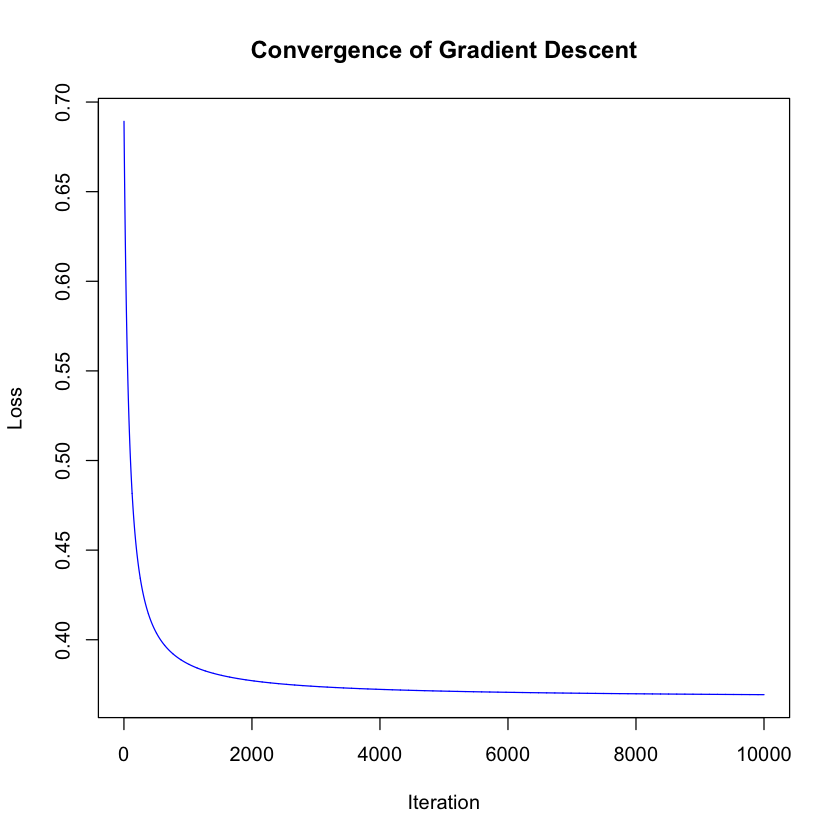

In [64]:

plot(1:result$iterations, result$loss_history,
     type = "l",
     xlab = "Iteration",
     ylab = "Loss",
     main = "Convergence of Gradient Descent",
     col = "blue")


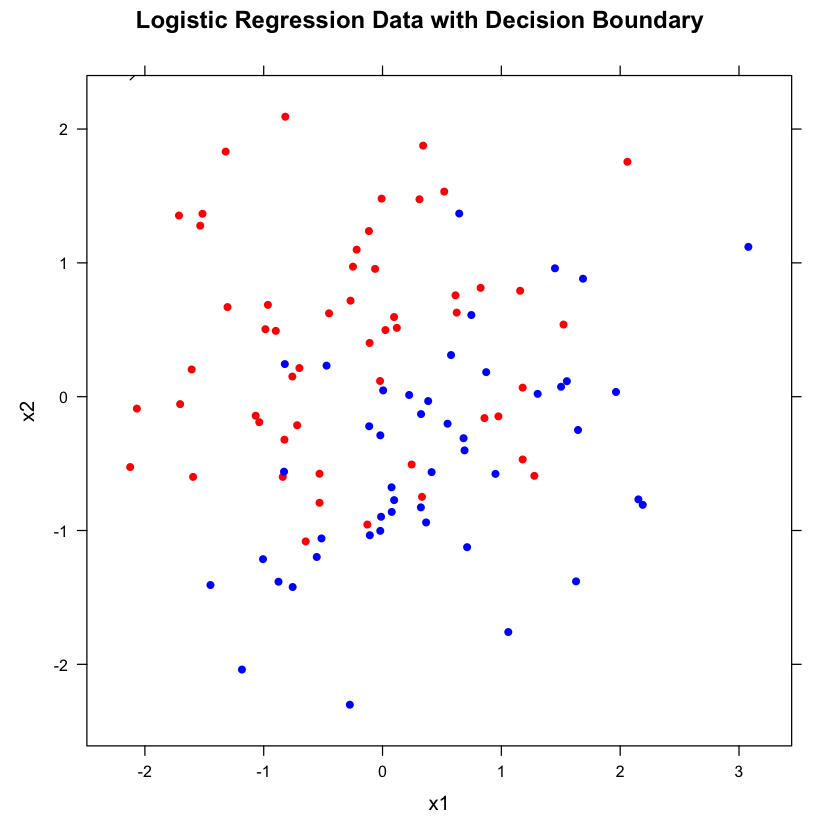

In [66]:

xyplot(x2 ~ x1,
       groups = factor(y),
       col = c("red", "blue"),
       pch = 16,
       xlab = "x1",
       ylab = "x2",
       main = "Logistic Regression Data with Decision Boundary",
       panel = function(x, y, ...) {
         panel.xyplot(x, y, ...)
         # Decision boundary: beta0 + beta1 * x1 + beta2 * x2 = 0
         x1_vals <- seq(min(x), max(x), length.out = 100)
         x2_vals <- -(result$beta[1] + result$beta[2] * x1_vals) / result$beta[3]
         panel.lines(x1_vals, x2_vals, col = "black")
       })


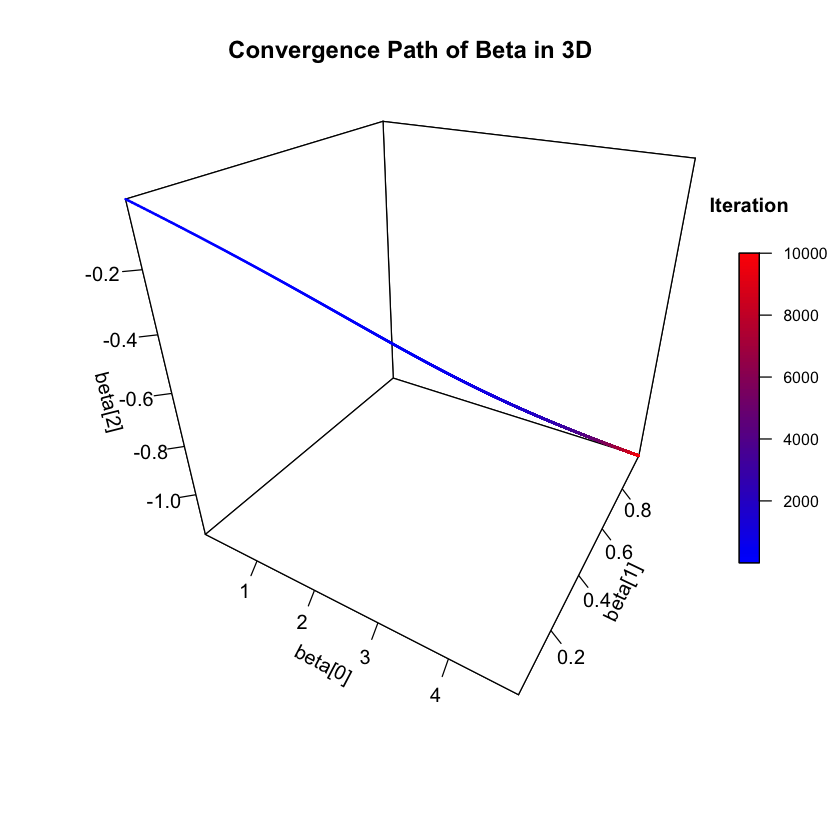

In [80]:
scatter3D(result$beta_history[,1], result$beta_history[,2], result$beta_history[,3],
          colvar = seq(1, result$iterations),  # Color by iteration
          col = ramp.col(c("blue", "red")),    # Gradient from blue to red
          type = "l",                          # Line plot
          lwd = 2,                             # Line width
          xlab = expression(beta[0]),
          ylab = expression(beta[1]),
          zlab = expression(beta[2]),
          main = "Convergence Path of Beta in 3D",
          ticktype = "detailed",
          phi = 30, theta = 30,               # Viewing angles
          colkey = list(length = 0.5, width = 0.8, cex.axis = 0.8, labels = TRUE),
          clab = "Iteration")


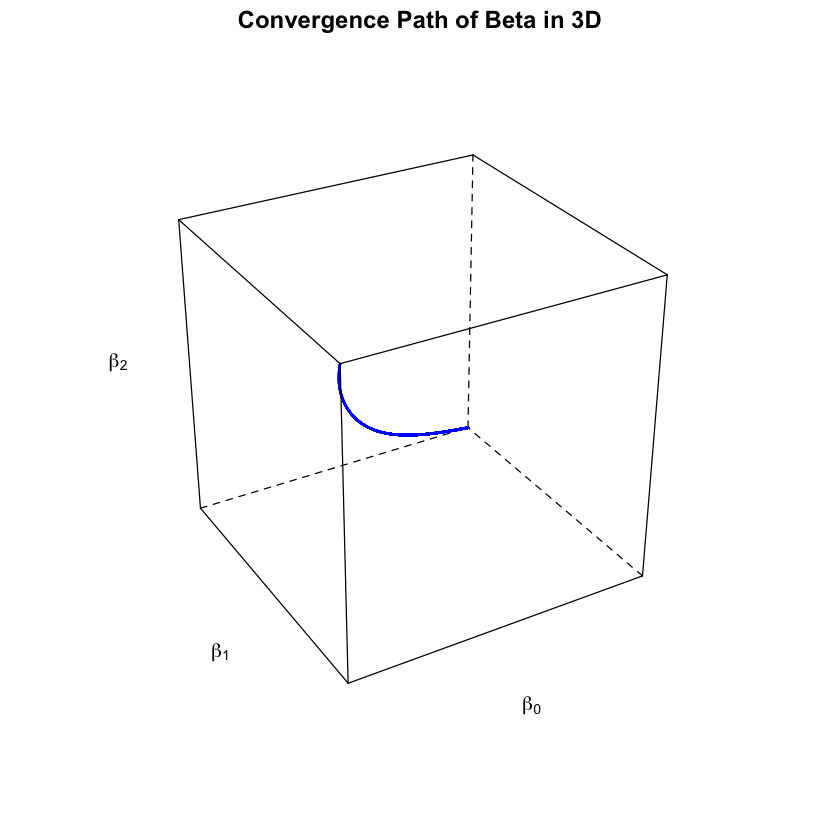

In [53]:
cloud(beta_history[,3] ~ beta_history[,1] * beta_history[,2], data = list(beta_history = result$beta_history),
      type = "l",
      col = "blue",
      lwd = 2,
      xlab = expression(beta[0]),
      ylab = expression(beta[1]),
      zlab = expression(beta[2]),
      main = "Convergence Path of Beta in 3D",
      screen = list(z = 30, x = -60),
      par.settings = list(axis.line = list(col = "transparent")),
      zoom = 0.8)

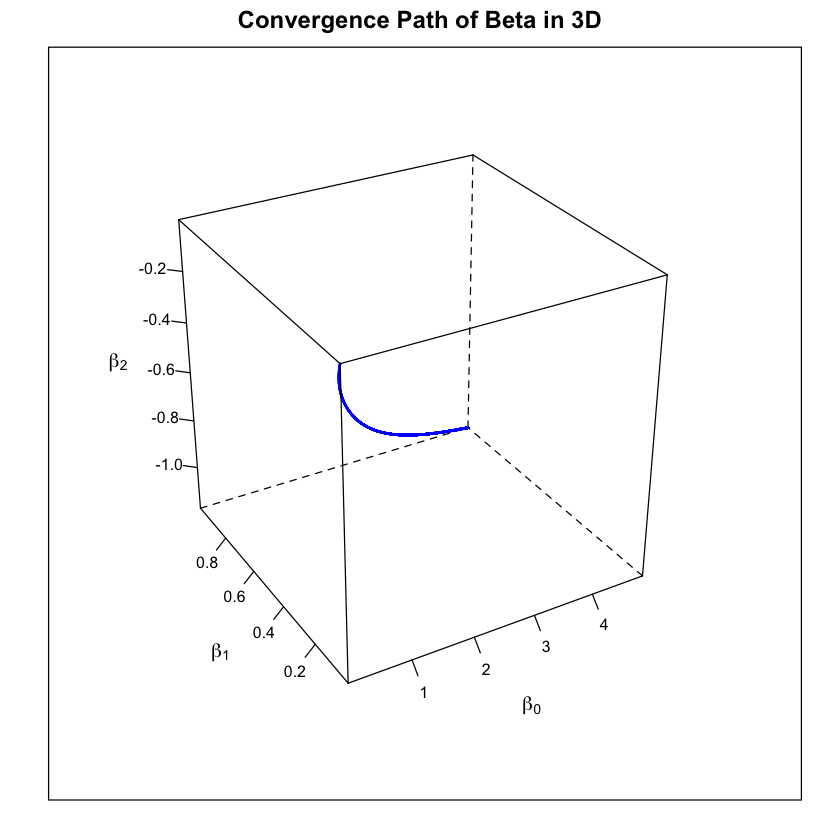

In [76]:
library(lattice)
cloud(beta_history[,3] ~ beta_history[,1] * beta_history[,2], 
      data = list(beta_history = result$beta_history),
      type = "l",
      col = "blue",
      lwd = 2,
      xlab = expression(beta[0]),
      ylab = expression(beta[1]),
      zlab = expression(beta[2]),
      main = "Convergence Path of Beta in 3D",
      screen = list(z = 30, x = -60),
      scales = list(arrows = FALSE, col = "black", distance = c(1, 1, 1), 
                    x = list(draw = TRUE, tick.number = 6),
                    y = list(draw = TRUE, tick.number = 6),
                    z = list(draw = TRUE, tick.number = 6)),
      zoom = 0.8)